## Pandas ile Webden Veri Çekme
- İnternetten veri çekme

In [10]:
import pandas as pd
import requests

In [14]:
url = 'https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population'

# 1. Adım: Kimlik bilgilerini (header) hazırlayın
headers = {
    'User-Agent': 'BenimBotum/1.0 (iletisim@eposta.com)'
}

# 2. Adım: Sayfayı requests ile çekin
response = requests.get(url, headers=headers)

# 3. Adım: Pandas ile gelen HTML içeriğini okuyun
tablolar = pd.read_html(response.text)

df = tablolar[0]

# İlk tabloyu göster
df.head()

/tmp/ipython-input-2826382413.py:12: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tablolar = pd.read_html(response.text)


,Location,Population,% of world,Date,Source (official or from the United Nations),Notes
0,World,8232000000,100%,13 Jun 2025,UN projection[1][3],NaN
1,India,1417492000,17.2%,1 Jul 2025,Official projection[4],[b]
2,China,1408280000,17.1%,31 Dec 2024,Official estimate[5],[c]
3,United States,340110988,4.1%,1 Jul 2024,Official estimate[6],[d]
4,Indonesia,284438782,3.5%,30 Jun 2025,National annual projection[7],NaN


In [13]:
# tablolar[0].to_csv("output.csv" , index=False)

<Axes: xlabel='Location'>

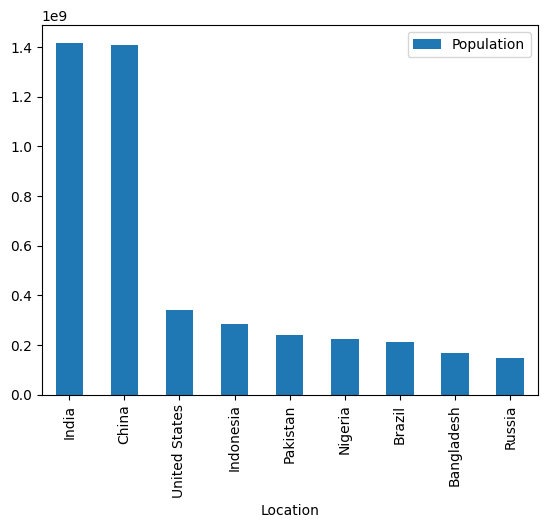

In [19]:
df.set_index("Location" , inplace = True)
df.iloc[1:10].plot(kind="bar")

## Web üzerinden bir dosya çekmek

In [23]:
import requests
import zipfile
import io

# Zip dosyasının URL'sini buraya ekleyin
zip_url = 'https://archive.ics.uci.edu/dataset/53/iris.zip' # Örnek URL, gerçek bir zip dosyası URL'si ile değiştirin

# Dosyayı indir
response = requests.get(zip_url)

# Yanıtın durum kodunu kontrol et
if response.status_code == 200:
    # İndirilen içeriği bir BytesIO nesnesine yaz
    zip_file_bytes = io.BytesIO(response.content)

    # Zip dosyasını aç
    with zipfile.ZipFile(zip_file_bytes, 'r') as zip_ref:
        # Tüm içeriği mevcut dizine çıkar
        zip_ref.extractall('.')
    print("Zip dosyası başarıyla indirildi ve çıkarıldı.")
else:
    print(f"Dosya indirilirken bir hata oluştu. Durum kodu: {response.status_code}")


BadZipFile: File is not a zip file

## Terminal komutlarıyla

In [24]:
!wget https://archive.ics.uci.edu/dataset/53/iris.zip

--2026-01-02 17:50:20--  https://archive.ics.uci.edu/dataset/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 585455 (572K) [text/html]
Saving to: ‘iris.zip’

iris.zip            100%[===================>] 571.73K  2.33MB/s    in 0.2s    

2026-01-02 17:50:20 (2.33 MB/s) - ‘iris.zip’ saved [585455/585455]



In [25]:
!unzip iris.zip

Archive:  iris.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of iris.zip or
        iris.zip.zip, and cannot find iris.zip.ZIP, period.


## Webde gerçek bir csv dosyasından veri çekmek

In [26]:
pd.read_csv(r"sample-data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'sample-data.csv'

## BS4

In [27]:
pip install bs4

In [28]:
from bs4 import BeautifulSoup
import requests

## Clipboard üzerinden veri çekmek(kopyalanmış bir veriyi okuma)

In [31]:
import pandas as pd
import io

# Kopyaladığınız veriyi buradaki tırnakların arasına yapıştırın
data = """
İsim,Yaş,Şehir
Ahmet,25,İstanbul
Ayşe,30,Ankara
Mehmet,22,İzmir
"""

df = pd.read_csv(io.StringIO(data))
print(df)

PyperclipException: 
    Pyperclip could not find a copy/paste mechanism for your system.
    For more information, please visit
    https://pyperclip.readthedocs.io/en/latest/index.html#not-implemented-error
    

## Görsel indirme scripti

In [33]:
pip install bing_image_downloader

In [34]:
from bing_image_downloader import downloader

In [35]:
downloader.download("bird",
                    limit = 100,
                    adult_filter_off= True)

[%] Downloading Images to /content/dataset/bird


[!!]Indexing page: 1

[%] Indexed 51 Images on Page 1.


[%] Downloading Image #1 from https://i.pinimg.com/originals/d1/71/0f/d1710f3cd106685325c5d880dcde8440.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://cdn3.emoji.gg/emojis/9140_Annoyed_Bird.png
[%] File Downloaded !

[%] Downloading Image #3 from https://c.tenor.com/b9U7lGdz-wcAAAAC/devil.gif
[%] File Downloaded !

[%] Downloading Image #4 from https://www.bing.com/th/id/OGC.bab583525d871375dc09a77ec45db2a5?o=7&amp;pid=1.7&amp;rm=3&amp;rurl=https%3a%2f%2fc.tenor.com%2fb9U7lGdz-wcAAAAC%2fdevil.gif&amp;ehk=CRu46YC5JQkJW%2fkrGgdanZJnX%2f589SLCdFRAfe8HW84%3d
[!] Issue getting: https://www.bing.com/th/id/OGC.bab583525d871375dc09a77ec45db2a5?o=7&amp;pid=1.7&amp;rm=3&amp;rurl=https%3a%2f%2fc.tenor.com%2fb9U7lGdz-wcAAAAC%2fdevil.gif&amp;ehk=CRu46YC5JQkJW%2fkrGgdanZJnX%2f589SLCdFRAfe8HW84%3d
[!] Error:: HTTP Error 404: Not Found
[%] Downloading Image #4 from https://pbs.tw

KeyboardInterrupt: 